# Question 1 

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import sklearn.neural_network as nn
import sklearn.metrics as metrics

dataSet = pandas.read_csv('F:\Assigmnents\Machine Learning\Assignment_05\SpiralWithCluster.csv',
                            delimiter=',')

In [2]:
dataSet.isnull().sum().sum() ##cheching null value

0

In [3]:
dataSet['SpectralCluster'].count()

100

##Question 1

In [4]:
#Question 1 a)
## Spectral cluster is a binary variable so percent of SpectralCluster = 1 is equal to sum of that colounm i.e count = 100

sC_1_percent = sum(dataSet['SpectralCluster'])

print('Percent of the observations have SpectralCluster equals to 1: ',sC_1_percent,'%')



Percent of the observations have SpectralCluster equals to 1:  50 %


In [5]:
# MLP Neural Network

xTrain = dataSet[['x','y']]
yTrain = dataSet['SpectralCluster']

y_threshold = dataSet['SpectralCluster'].mean()

In [6]:
def Build_NN_SpectralCluster (nLayer, nHiddenNeuron, actifunction):
    
    # Build Neural Network
    nnObj = nn.MLPClassifier(hidden_layer_sizes = (nHiddenNeuron,)*nLayer,
                                 activation = actifunction, verbose = False,
                                 solver = 'lbfgs', learning_rate_init = 0.1,
                                 max_iter = 5000, random_state = 20200408)
    # nnObj.out_activation_ = 'identity'
    thisFit = nnObj.fit(xTrain, yTrain) 
    y_predProb = nnObj.predict_proba(xTrain)
    y_pred = numpy.where(y_predProb[:,1] >= y_threshold, 1, 0)
    

    activation = actifunction
    mlp_loss = nnObj.loss_
    iters = nnObj.n_iter_
    mlp_accuracy = metrics.accuracy_score(yTrain, y_pred)
    misclassification = 1 - mlp_accuracy
    #print(nnObj.out_activation_)

    return(activation, nLayer, nHiddenNeuron, iters, mlp_loss, misclassification)
  

In [7]:
allactivation = ['identity','logistic','relu','tanh']
table = pandas.DataFrame(columns = ['Activation','Layer(s)', 'Neurons per Layer','Iterations ', 'Loss', 'Misclassification'])
for actfun in allactivation:
    result = pandas.DataFrame(columns = ['Activation','Layer(s)', 'Neurons per Layer','Iterations ', 'Loss', 'Misclassification'])

    for i in numpy.arange(1,5):
        for j in numpy.arange(1,11,1):
             activation, nLayer, nHiddenNeuron, iters, mlp_loss, misclassification = Build_NN_SpectralCluster (nLayer = i, nHiddenNeuron = j, actifunction = actfun)
             result = result.append(pandas.DataFrame([[activation, nLayer, nHiddenNeuron, iters, mlp_loss, misclassification]], 
                                   columns = ['Activation','Layer(s)', 'Neurons per Layer','Iterations ', 'Loss', 'Misclassification']))   
    table = table.append(result[result.Loss == result.Loss.min()])
    #table = table.append(result)


In [8]:
table

,Activation,Layer(s),Neurons per Layer,Iterations,Loss,Misclassification
0,identity,1,1,9,0.666290,0.5
0,logistic,3,6,613,0.000790,0.0
0,relu,4,10,55,0.000107,0.0
0,tanh,3,9,72,0.000169,0.0


In [9]:
#Question 1 c 
#nnObj.out_activation_
print("Activation function of outlayer is Logistic")

Activation function of outlayer is Logistic


In [10]:
##Question 1 d 
table[table.Loss == table.Loss.min()]

,Activation,Layer(s),Neurons per Layer,Iterations,Loss,Misclassification
0,relu,4,10,55,0.000107,0.0


In [11]:
##Question 1 e


xTrain = dataSet[['x','y']]
yTrain = dataSet['SpectralCluster']
 
nLayer = 4
nHiddenNeuron = 10
nnObj = nn.MLPClassifier(hidden_layer_sizes = (nHiddenNeuron,)*nLayer,
                         activation = 'relu', verbose = False,
                         solver = 'lbfgs', learning_rate_init = 0.1,
                         max_iter = 5000, random_state = 20200408)
thisFit = nnObj.fit(xTrain, yTrain) 
y_predProb = nnObj.predict_proba(xTrain)
dataSet['_PredictedClass_'] = numpy.where(y_predProb[:,1] >= y_threshold, 1, 0)


mlp_Mean = dataSet.groupby('_PredictedClass_').mean()

print(mlp_Mean)





                    id         x         y  SpectralCluster
_PredictedClass_                                           
0                 52.5 -0.052476 -0.446791              0.0
1                 48.5  0.018718  0.429089              1.0


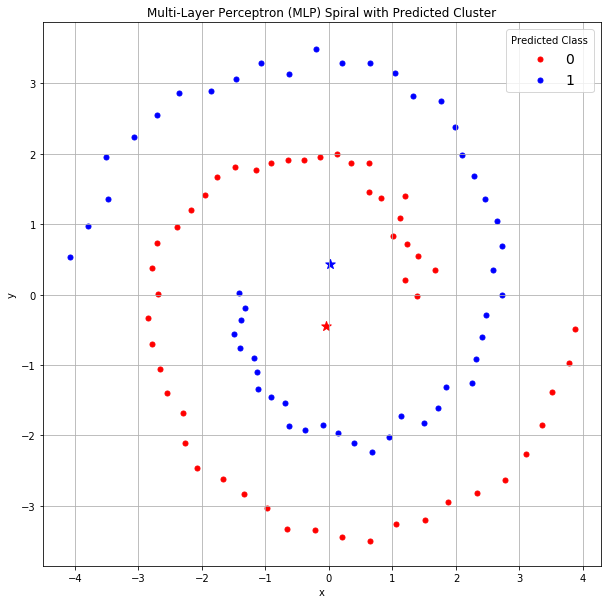

In [12]:
subData1 = dataSet[dataSet['_PredictedClass_'] == 0]
subData2 = dataSet[dataSet['_PredictedClass_'] == 1]

plt.figure(figsize=(10,10))
plt.scatter(x = subData1['x'], y = subData1['y'], c = 'red', label = 0, s = 25)
plt.scatter(x = subData2['x'], y = subData2['y'], c = 'blue', label = 1, s = 25)


plt.scatter(x = mlp_Mean['x'][0], y = mlp_Mean['y'][0], c = 'red', marker = '*', s = 100)
plt.scatter(x = mlp_Mean['x'][1], y = mlp_Mean['y'][1], c = 'blue', marker = '*', s = 100)

plt.grid(True)
plt.title('Multi-Layer Perceptron (MLP) Spiral with Predicted Cluster')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title = 'Predicted Class', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.show()

In [13]:
## Question 1 f Prob(SpectralCluster = 1) 

dataSet['Prob(1)'] = y_predProb[:,1]


In [15]:
subData_0 = dataSet[dataSet['SpectralCluster'] == 0]

sum_predProb = len(subData_0['Prob(1)'])
print('Count of the predicted probability Prob(SpectralCluster = 1) when SpectralCluster is 0: ',sum_predProb)

mean_predProb = (subData_0['Prob(1)']).mean()
print('Mean of the predicted probability Prob(SpectralCluster = 1) when SpectralCluster is 0:', mean_predProb)

std_predProb = (subData_0['Prob(1)']).std()

print('Standard Deviation of the predicted probability Prob(SpectralCluster = 1) when SpectralCluster is 0:', std_predProb)

Count of the predicted probability Prob(SpectralCluster = 1) when SpectralCluster is 0:  50
Mean of the predicted probability Prob(SpectralCluster = 1) when SpectralCluster is 0: 6.767499676022591e-06
Standard Deviation of the predicted probability Prob(SpectralCluster = 1) when SpectralCluster is 0: 1.875336870917491e-05


In [16]:
subData_1 = dataSet[dataSet['SpectralCluster'] == 1]

sum_predProb = len(subData_1['Prob(1)'])
print('Count of the predicted probability Prob(SpectralCluster = 1) when SpectralCluster is 1: ',sum_predProb)

mean_predProb = (subData_1['Prob(1)']).mean()
print('Mean of the predicted probability Prob(SpectralCluster = 1) when SpectralCluster is 1:', mean_predProb)

std_predProb = (subData_1['Prob(1)']).std()

print('Standard Deviation of the predicted probability Prob(SpectralCluster = 1) when SpectralCluster is 1:', std_predProb)

Count of the predicted probability Prob(SpectralCluster = 1) when SpectralCluster is 1:  50
Mean of the predicted probability Prob(SpectralCluster = 1) when SpectralCluster is 1: 0.9999936616365919
Standard Deviation of the predicted probability Prob(SpectralCluster = 1) when SpectralCluster is 1: 2.383736587454798e-05


# Question 2

In [17]:
import matplotlib.pyplot as plt
import numpy
import pandas
import sklearn.metrics as metrics
import sklearn.svm as svm

In [18]:
traindata = pandas.read_csv('F:\Assigmnents\Machine Learning\Assignment_05\SpiralWithCluster.csv',
                            delimiter=',')

In [25]:
xTrain = traindata[['x','y']]
yTrain = traindata['SpectralCluster']

svm_Model = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr',
                    random_state = 20200408, max_iter = -1)
thisFit = svm_Model.fit(xTrain, yTrain) 
y_predictClass = thisFit.predict(xTrain)

svm_Mean = traindata.groupby('_PredictedClass_').mean()

accuracy = metrics.accuracy_score(yTrain, y_predictClass)

print('Mean Accuracy = ', accuracy)
traindata['_PredictedClass_'] = y_predictClass

print('Intercept = ', thisFit.intercept_)
print('Coefficients = ', thisFit.coef_)


Mean Accuracy =  0.5
Intercept =  [0.003345]
Coefficients =  [[0.05333512 0.32868383]]


In [26]:
# get the separating hyperplane
w = thisFit.coef_[0]
a = -w[0] / w[1]
xx = numpy.linspace(-5, 5)
yy = a * xx - (thisFit.intercept_[0]) / w[1]


In [27]:
##Question 2 b Misclassification Rate

misclassification  = 1 - accuracy
print("Misclassification Rate: ", misclassification)


Misclassification Rate:  0.5


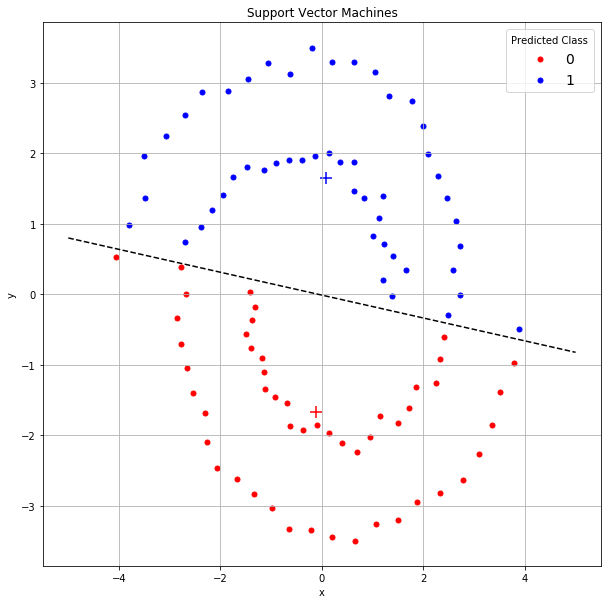

In [29]:
##Question 2 c 


# plot the line, the points, and the nearest vectors to the plane
carray = ['red', 'blue']
plt.figure(figsize=(10,10))
for i in range(2):
    subData = traindata[traindata['_PredictedClass_'] == i]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = i, s = 25)
plt.scatter(x = svm_Mean['x'][0], y = svm_Mean['y'][0], c = 'red', marker = '+', s = 150)
plt.scatter(x = svm_Mean['x'][1], y = svm_Mean['y'][1], c = 'blue', marker = '+', s = 150)
plt.plot(xx, yy, color = 'black', linestyle = '--')

plt.grid(True)
plt.title('Support Vector Machines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title = 'Predicted Class', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.show()

In [30]:
##Question 2 d 

# Convert to the polar coordinates
traindata['radius'] = numpy.sqrt(traindata['x']**2 + traindata['y']**2)
traindata['theta'] = numpy.arctan2(traindata['y'], traindata['x'])

def customArcTan (z):
    theta = numpy.where(z < 0.0, 2.0*numpy.pi+z, z)
    return (theta)

traindata['theta'] = traindata['theta'].apply(customArcTan)

# Build Support Vector Machine classifier
xTrain = traindata[['radius','theta']]
yTrain = traindata['SpectralCluster']

print(xTrain.isnull().sum())

svm_Model = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr',
                    random_state = 20200408, max_iter = -1)
thisFit = svm_Model.fit(xTrain, yTrain) 
y_predictClass = thisFit.predict(xTrain)

print('Mean Accuracy = ', metrics.accuracy_score(yTrain, y_predictClass))
traindata['_PredictedClass_'] = y_predictClass

print('Intercept = ', thisFit.intercept_)
print('Coefficients = ', thisFit.coef_)




radius    0
theta     0
dtype: int64
Mean Accuracy =  0.55
Intercept =  [1.7610532]
Coefficients =  [[-0.57239859 -0.05567796]]


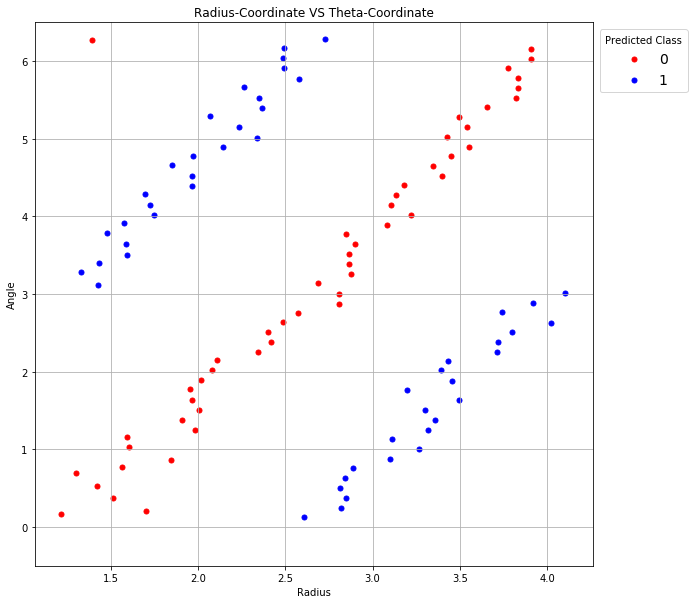

In [31]:
# plot the line, the points, and the nearest vectors to the plane
carray = ['red', 'blue']
plt.figure(figsize=(10,10))
for i in range(2):
    subData = traindata[traindata['SpectralCluster'] == (i)]
    plt.scatter(x = subData['radius'],
                y = subData['theta'], c = carray[i], label = (i), s = 25)
plt.grid(True)
plt.title('Radius-Coordinate VS Theta-Coordinate')
plt.xlabel('Radius')
plt.ylabel('Angle')
plt.ylim(-0.5, 6.5)
plt.legend(title = 'Predicted Class', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.show()

In [33]:
##Question 2 e
xTrain = traindata[['radius','theta']]
yTrain = traindata['SpectralCluster']
traindata['Group'] = 2

traindata.loc[(traindata['radius'] < 2.5) & (traindata['theta'] > 3) , ['Group']] = 1
traindata.loc[(traindata['radius'] < 3) & (traindata['theta'] > 5.5) & (traindata['radius'] > 2.5), ['Group']] = 1
traindata.loc[(traindata['radius'] > 2.5) & (traindata['theta'] < 2) , ['Group']] = 3
traindata.loc[(traindata['radius'] > 3.25) & (traindata['theta'] < 3.1) & (traindata['theta'] > 1.9), ['Group']] = 3
traindata.loc[(traindata['radius'] < 1.5) & (traindata['theta'] > 6), ['Group']] = 0


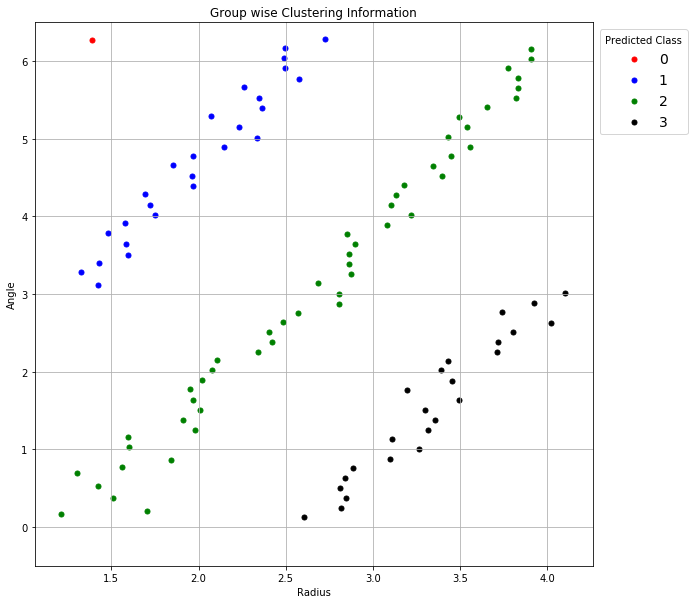

In [34]:
carray = ['red', 'blue', 'green', 'black']
plt.figure(figsize=(10,10))
for i in range(4):
    subData = traindata[traindata['Group'] == (i)]
    plt.scatter(x = subData['radius'],
                y = subData['theta'], c = carray[i], label = (i), s = 25)
plt.ylim(-0.5, 6.5)
plt.legend(title = 'Predicted Class', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.grid(True)
plt.title('Group wise Clustering Information')
plt.xlabel('Radius')
plt.ylabel('Angle')
plt.show()

In [35]:
##Question 2 f
def create_svmModel(dataFram):
    xTrain = dataFram[['radius','theta']]
    yTrain = dataFram['Group']

    svm_Model = svm.SVC(kernel = 'linear', decision_function_shape = 'ovr',
                        random_state = 20200408, max_iter = -1)
    thisFit = svm_Model.fit(xTrain, yTrain) 
    y_predictClass = thisFit.predict(xTrain)

    #print('Mean Accuracy = ', metrics.accuracy_score(yTrain, y_predictClass))

    Intercepts =  thisFit.intercept_
    Coefficients = thisFit.coef_

    #print('Intercept = ', thisFit.intercept_)
    #print('Coefficients = ', thisFit.coef_)
    
    return (Intercepts, Coefficients)

In [36]:
##Creating diffrent subsets
subData_0  = traindata[traindata['Group'] == 0]
subData_1  = traindata[traindata['Group'] == 1]
subData_2  = traindata[traindata['Group'] == 2]
subData_3  = traindata[traindata['Group'] == 3]


In [37]:
#SVM 0: Group 0 versus Group 1

subData_SVM_0_1 = pandas.concat([subData_0,subData_1])

Intercepts, Coefficients = create_svmModel(subData_SVM_0_1)

print('Intercept for SVM 0 = ', Intercepts)
print('Coefficients for SVM 0= ', Coefficients)


# get the separating hyperplane
xx = numpy.linspace(1, 4.5)
w = Coefficients
a = -w[0][0] / w[0][1]
yy01 = a * xx - (Intercepts) / w[0][1]


Intercept for SVM 0 =  [1.46912508]
Coefficients for SVM 0=  [[ 0.93378415 -0.45380249]]


In [38]:
#SVM 1: Group 1 versus Group 2

subData_SVM_1_2 = pandas.concat([subData_1,subData_2])

Intercepts, Coefficients = create_svmModel(subData_SVM_1_2)

print('Intercept for SVM 1 = ', Intercepts)
print('Coefficients for SVM 1= ', Coefficients)

# get the separating hyperplane
xx = numpy.linspace(1, 4.5)
w = Coefficients
a = -w[0][0] / w[0][1]
yy12 = a * xx - (Intercepts) / w[0][1]


Intercept for SVM 1 =  [-0.87689426]
Coefficients for SVM 1=  [[ 1.89209533 -0.89613249]]


In [39]:
#SVM 2: Group 2 versus Group 3

subData_SVM_2_3 = pandas.concat([subData_2,subData_3])

Intercepts, Coefficients = create_svmModel(subData_SVM_2_3)

print('Intercept for SVM 2 = ', Intercepts)
print('Coefficients for SVM 2 = ', Coefficients)


# get the separating hyperplane
xx = numpy.linspace(1, 4.5)
w = Coefficients
a = -w[0][0] / w[0][1]
yy23 = a * xx - (Intercepts) / w[0][1]

Intercept for SVM 2 =  [-4.13284488]
Coefficients for SVM 2 =  [[ 2.01258355 -0.83756164]]


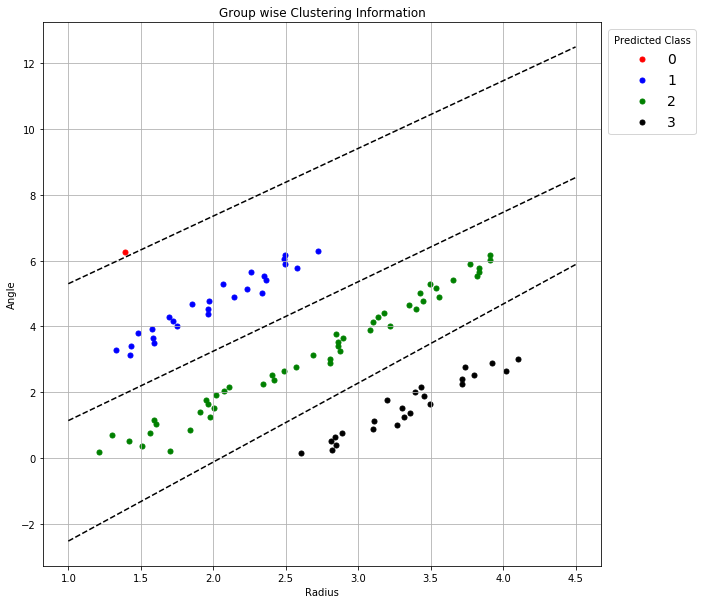

In [40]:
# Question 2 g
# plot the line, the points, and the nearest vectors to the plane
carray = ['red', 'blue', 'green', 'black']
plt.figure(figsize=(10,10))
for i in range(4):
    subData = traindata[traindata['Group'] == (i)]
    plt.scatter(x = subData['radius'],
                y = subData['theta'], c = carray[i], label = (i), s = 25)

plt.plot(xx, yy01, color = 'black', linestyle = '--')
plt.plot(xx, yy12, color = 'black', linestyle = '--')
plt.plot(xx, yy23, color = 'black', linestyle = '--')
plt.legend(title = 'Predicted Class', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.grid(True)
plt.title('Group wise Clustering Information')
plt.xlabel('Radius')
plt.ylabel('Angle')
plt.show()

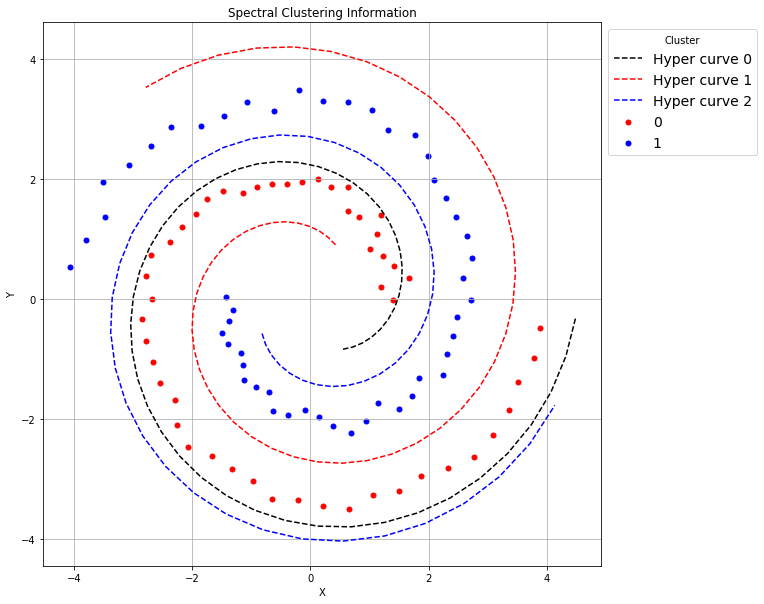

In [41]:
## Question 2 h

h0_xx01 = xx * numpy.cos(yy01)
h0_yy01 = xx * numpy.sin(yy01)

h0_xx12 = xx * numpy.cos(yy12)
h0_yy12 = xx * numpy.sin(yy12)

h0_xx23 = xx * numpy.cos(yy23)
h0_yy23 = xx * numpy.sin(yy23)


carray = ['red', 'blue', 'green', 'black']
plt.figure(figsize=(10,10))
for i in range(2):
    subData = traindata[traindata['SpectralCluster'] == (i)]
    plt.scatter(x = subData['x'],
                y = subData['y'], c = carray[i], label = (i), s = 25)

plt.plot(h0_xx01, h0_yy01, color = 'black', linestyle = '--',label = 'Hyper curve 0')
plt.plot(h0_xx12, h0_yy12, color = 'red', linestyle = '--',label = 'Hyper curve 1')
plt.plot(h0_xx23, h0_yy23, color = 'blue', linestyle = '--',label = 'Hyper curve 2')
plt.legend(title = 'Cluster', loc = 'best', bbox_to_anchor = (1, 1), fontsize = 14)
plt.grid(True)
plt.title('Spectral Clustering Information')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()